In [1]:
# Källkoden till deluppgift 1 skriver du här:

import csv

  #Den här funktionen kommer returnera rätt klass typ beroende om elementet består av siffror eller bokstäver
def korrekt_klass(string):
  try:
    int(string)
    return int(string)
  
  except ValueError:
    return str(string)


def read_file(file_name):

    # vi vill ha ett with kommande här för att slippa ladda in filen i minnet ifall att det skulle bli fel
  
  befolkning = []
  with open(file_name,"r") as file:
    
      # läser in rad för rad i objektet reader och sedan element för element i listan "rad", muterar vi elementen till korrekt klasstyp

    reader = csv.reader(file, delimiter=";")
    for row in reader:
      for index,value in enumerate(row):
        row[index] = korrekt_klass(value)
      
        # lägg till rad för rad  i listan befolkning

      befolkning.append(row)
      
  return befolkning

In [2]:
# Källkoden till deluppgift 2 skriver du här:


def analysera_data(befolkning):
  
    # vi vet att fösta listan i vår lista håller alla åren så vi sparar den i variabeln years
  years = befolkning[0]
  
    # skapa en ny lista och variabler som ska användas för beräkning
  lista = []
  befolkning_2100 = 0
  befolkning_2019 = 0

    # itererar rad för rad (förutom år-raden) och sorterar varje rad så att variablerna kol1 får minsta värdet och kol2 får högsta värdet
  
  for row in befolkning[1:]:
    kol0 = row[0]
    kol1 = sorted(row[1:], reverse=True).pop()
    kol3 = sorted(row[1:], reverse=False).pop()

      # raderna i sig är fortfarande oförändrade så vi vet att sista respektive första elementet i varje rad är 2100/2019
    
    befolkning_2100 = row[-1]
    befolkning_2019 =row[1]

      # formeln för befolkningsökning/minskning
    
    kol5 = f"{((befolkning_2100-befolkning_2019)/(befolkning_2019*100)):.5f}%"

      # vi vet att åren i listan years har samma index som kol1 och kol3 för varje år
      # därför itererar vi i varje rad för att returnera årtalet med samma index som där minsta/högsta värdet hittades

    for index in range(len(row)):
      if row[index] == kol1:
        kol2 = years[index]
      elif row[index]== kol3:
        kol4 = years[index]
    
      # rad för rad så lägger vi till listan i vår nya lista

    lista.append([kol0,kol1,kol2,kol3,kol4,kol5])
  return lista

In [3]:
# Källkoden till deluppgift 3 skriver du här:


  # deklarera en funktion för vår tabell

def tabell(lista):
    
    # de listor med de fem högsta/lägsta värdena i befolkningsökning (sista elementet x[-1]) sätts i variabeln top5/bottom5

  top5 = sorted(lista, key=lambda x: x[-1], reverse=True)[:5]
  bottom5 = sorted(lista, key=lambda x: x[-1], reverse=True)[-5:]
  
  print("---------------------------------------------------------------------------")
  print("Förväntad befolkningsutveckling för tio länder inom EU under åren 2019-2020",end="\n\n")

  print("(Tabellen visar de fem länder med störst respektive minst förväntad befolkningsökning)")
  
  print("--------------------------------------------------------------------------------------")
  
  print("                           Estimerad befolkning")
    
  print("                           --------------------")
  print("--------------------------------------------------------------------------------------")

  columns = [["Land","Lägst befolkningsantal","År","Högst befolkningsantal","År","Förändring [%]"]]

    # lägg våra titlar från variabeln columns överset och skriv sedan ut översta 5 och sedan nedersta 5 listorna, rad för rad

  for i in columns:
    top5.insert(0,i)
      
    for i in top5:
      print(i)
        
      for y in bottom5:
        print(y)
          
  print("--------------------------------------------------------------------------------------")

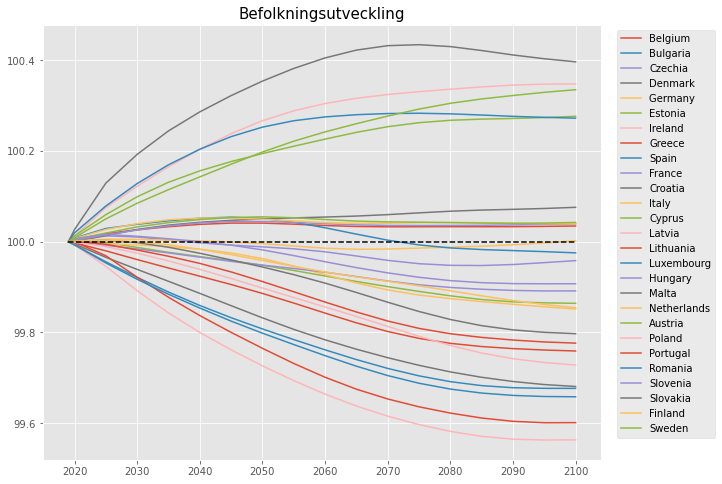

In [4]:
# Källkoden till deluppgift 4 skriver du här:

  # ggplot ser riktigt bra ut och man får mer rutnät

import matplotlib.pyplot as plt
plt.style.use('ggplot')


lista = read_file("befolkningsdata.csv")

  # Vi vill inte normera årtalen i sig så vi sparar dessa redan nu i listan befolkningsutveckling

befolkningsutveckling = [lista[0]]
values = []

  # Därefter itererar vi rad för rad
  # vi vet att första elementet i varje rad är namnet på landet så vi lägger till som vanligt i listan values
  # resten av elementen (index>0) normeras med formeln nedan och läggs och till i listan values

for row in lista[1:]:
  values = []

  for index in range(len(row)):
    if index < 1:
      values.append(row[index])

    else:
      utveckling_bas = 100 + ((row[index] - row[1])/row[1])
      values.append(utveckling_bas)

  # den här variabeln håller nu vår transformerade 2D-lista med normerade värden i varje lista

  befolkningsutveckling.append(values)

  # vi deklarerar en funktion som gör diagramet åt oss

def diagram(lista):
  
    # skapa en instans av en plt figur

  fig,ax = plt.subplots(figsize=[10,8])

  # första listan håller alla årtalen som ska finnas på x-axeln.

  for index,row in enumerate(lista):
    years_x = lista[0][1:]

    # sedan sparar vi länderna och deras värden i två olika variabler

    if index > 0:
      country = row[0]
      values_y = row[1:]

        # värdena på y-axeln, årtal på x-axeln och en linje per land

      ax.plot(years_x, values_y, label=country)
      ax.legend(bbox_to_anchor=(1.02,1))

    # skapa en helt horisontell linje för normvärdet 100

  ax.plot(years_x, [100 for i in range(18)],color='black',linestyle='--' )
  ax.set_title("Befolkningsutveckling", fontsize=15)
  plt.show()

diagram(befolkningsutveckling)

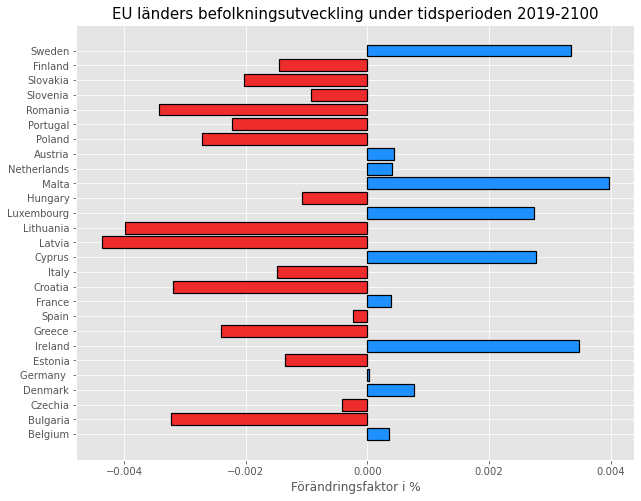

In [5]:
# Källkoden till deluppgift 5 skriver du här:

lista = analysera_data(read_file("befolkningsdata.csv"))

def bar_chart(lista):
  countries = []
  growth = []

    # lägg till förändringsfaktorer i growth och respektive länder i countries

  for i in lista:
    growth.append(eval(i[-1][:-1]))
    countries.append(i[0])

    # skapa instans av plt figur

  fig, ax = plt.subplots(figsize=[10,8])

    # en lista som innehåller en röd färg för varje element som finns i listan countries

  colormap = ["#EE2C2C" for i in range(len(countries))]
  
    # ifall det finns ett värde > 0 i listan growth så används samma index i listan colormap för att modifiera den färgen till blå (positivt värde för ländet) annars är det rött (negativt värde för landet)
  
  for index,i in enumerate(growth):
    if i > 0:
      colormap[index] = "#1E90FF"

    # stapeldiagram med förändringsfaktor på x-axeln, länder på y-axeln

  ax.barh(countries, growth, align="center", color = colormap, edgecolor="black", linewidth=1.2)
  ax.set_title("EU länders befolkningsutveckling under tidsperioden 2019-2100", fontsize=15)
  ax.set_xlabel("Förändringsfaktor i %", fontsize=12)
  
  plt.show()

bar_chart(lista)

In [10]:
# Källkoden till deluppgift 6 skriver du här:

  # skapa en hjälpfunktion som ger oss ett boolean värde beroende på om du vill fortsätta eller ej i programmet

def testa_igen(response):
  while True:

    if response.lower()=="ja":
        return True
        
    elif response.lower()=="nej":
      return False
    else:
      break

  # deklarera funktion för programmet

def program():

    # vi startar alltid på true och kör programmet så länge boolean är True

  boolean = True
  while boolean:
    val_input = input("Vad vill du göra?: 1.Hämta data från fil/ 2. Analysera data/ 3. Avsluta")
    
    # Vi kör en try-sats här eftersom om användaren ger en input som inte är godkänd så körs testa_igen funktionen
    
    try:

        # gör om valet till en siffra ifall användaren ger en giltig input
      val_input = int(val_input)

        # användare väljer nr 1

      if val_input==1:
          file_name = input("Vad heter filen du vill hämta?: ")
          befolkning = read_file(file_name.lower())

            # Vill användaren få ut en tabell som har analyserat listan åt personen (val_input==2)?
            # eller spara filen som den är i en lista (val2_input==3) 
  
          if befolkning:
            val2_input = int(input("Vad vill du göra nu?: 2. Analysera data/ 3. Avsluta"))
            
            if val2_input==2:
              tabell(analysera_data(befolkning))
              break

            elif val2_input==3:
              return befolkning

        # Att välja alt 2 är egentligen inte ok utan att först hämta filen så användaren får börja om ifall hon/han vill.

      elif val_input==2:
        ingen_fil = input("Det verkar som att du inte har hämtat filen än. Vill du börja om? Ja/Nej: ")
        
          # ett ja leder till en continue sats som gör att användaren hoppar tillbaka till första menyn igen

        if testa_igen(ingen_fil):
          continue

          # ett nej leder till att while loopen slutas köras och break satsen avbryter programmet

        elif not testa_igen(ingen_fil):
          boolean = False
          #break
      
        # alt 3 leder till att while loopen slutas köras. (break sats fungerar med)

      elif val_input==3:
        boolean = False
      
        # om användarna ger en felaktig input får dom börja om ifall de vill annars avlutas programmet med en break-sats

    except (NameError, SyntaxError, ValueError, FileNotFoundError):
      fel = input("Jag förstod inte det där riktigt. Vill du testa igen? Ja/Nej: ")
      if not testa_igen(fel):
        boolean = False

if __name__=='__main__':
  program()